In [2]:
author="Jumabek Alikhanov"
date = 'Nov 19,2019'

In [3]:
#imports
import os
from os.path import join
import glob
import pandas as pd
import numpy as np
import time
%load_ext autoreload

In [9]:
# load data
#Please download dataset from http://205.174.165.80/CICDataset/CIC-IDS-2017/
dataroot = 'MachineLearningCVE/'
SEED=2

In [10]:
%autoreload 2
from preprocessing import load_data
X,y = load_data(dataroot) # reads csv file and returns np array of X,y -> of shape (N,D) and (N,1)

MachineLearningCVE/*.pcap_ISCX.csv
there are 2830743 flow records with 79 feature dimension
stripped column names
dropped bad columns
There are 0 nan entries
converted to numeric


## Data Imbalance
1. It is curucial to adress this issue in order to get decent performance
2. It also affects evaluation, we should calculate  `balanced accuracy`

In [11]:
from preprocessing import balance_data, normalize
X = normalize(X)

In [16]:

%autoreload 2
from models import Classifier

def ensure_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

def getClassifier(args,runs_dir=None):
    
    (method,optim,lr,reg,batch_size,input_dim,num_class,num_epochs) = args
    if runs_dir is not None:
        ensure_dir(runs_dir)
    
    clf = Classifier(method,input_dim,num_class,lr=lr,reg=reg,num_epochs=num_epochs,
                        batch_size=batch_size,runs_dir=runs_dir)
    return clf


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
K=5
skf = StratifiedKFold(n_splits=K,random_state=SEED)
for fold_index, (train_index,test_index) in enumerate(skf.split(X,y)):# runs only once 
        print('---------------------------------------------')
        print('Fold #{}'.format(fold_index))    
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        break

---------------------------------------------
Fold #0


(2264586, 76)

In [23]:

#hyper-params
batch_size = 5120
optim = 'Adam'

input_dim = X_train.shape[1]
num_class = len(np.unique(y_train))

accuracies = {}
learning_rates = [1e-4,1e-2,1e-0]
regularizations = [1e-6,1e-4,1e-2]
best_model = None
best_acc = -1
num_layers = 3
method = 'softmax'
num_epochs = 20
for lr in learning_rates:
    for reg in regularizations:

        classifier_args = (method,optim,lr,reg,batch_size,input_dim,num_class,num_epochs)
        config =  '{}/train/optim_{}_lr_{}_reg_{}_bs_{}'.format(method,num_layers,optim,lr,reg,batch_size)
        runs_dir = join(dataroot,'runs',config)
        
        X_train = X_train.astype(float)
        y_train = y_train.astype(int)
        p = np.random.permutation(len(y_train))
        X_train = X_train[p]
        y_train = y_train[p]
        X_train,y_train = balance_data(X_train,y_train,seed=SEED)

        tick = time.time()
        clf = getClassifier(classifier_args,runs_dir)
        
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        
        acc = metrics.balanced_accuracy_score(y_test,pred)
        if acc >best_acc:
            best_model = clf
            best_acc = acc
        accuracies[(lr,reg)]=acc
        tock = time.time()
        print("Model is trained in {0:.0f} sec ".format(tock-tick))

best epoch 0, best batch 0
bst acc  -1
Epoch [1/20], Step [50/398], Loss: 2.7035
Epoch [1/20], Step [100/398], Loss: 2.6841
Epoch [1/20], Step [150/398], Loss: 2.6640
Epoch [1/20], Step [200/398], Loss: 2.6429
Epoch [1/20], Step [250/398], Loss: 2.6241
Epoch [1/20], Step [300/398], Loss: 2.6030
Epoch [1/20], Step [350/398], Loss: 2.5855
Epoch [2/20], Step [1/398], Loss: 2.5660
Epoch [2/20], Step [51/398], Loss: 2.5475
Epoch [2/20], Step [101/398], Loss: 2.5262
Epoch [2/20], Step [151/398], Loss: 2.5121
Epoch [2/20], Step [201/398], Loss: 2.4996
Epoch [2/20], Step [251/398], Loss: 2.4747
Epoch [2/20], Step [301/398], Loss: 2.4643
Epoch [2/20], Step [351/398], Loss: 2.4435
Epoch [3/20], Step [2/398], Loss: 2.4225
Epoch [3/20], Step [52/398], Loss: 2.4107
Epoch [3/20], Step [102/398], Loss: 2.3868
Epoch [3/20], Step [152/398], Loss: 2.3747
Epoch [3/20], Step [202/398], Loss: 2.3706
Epoch [3/20], Step [252/398], Loss: 2.3569
Epoch [3/20], Step [302/398], Loss: 2.3387
Epoch [3/20], Step [35

Epoch [4/20], Step [303/398], Loss: 2.2057
Epoch [4/20], Step [353/398], Loss: 2.1714
Epoch [5/20], Step [4/398], Loss: 2.1746
Epoch [5/20], Step [54/398], Loss: 2.1562
Epoch [5/20], Step [104/398], Loss: 2.1477
Epoch [5/20], Step [154/398], Loss: 2.1573
Epoch [5/20], Step [204/398], Loss: 2.1141
Epoch [5/20], Step [254/398], Loss: 2.1221
Epoch [5/20], Step [304/398], Loss: 2.1033
Epoch [5/20], Step [354/398], Loss: 2.0927
Epoch [6/20], Step [5/398], Loss: 2.0764
Epoch [6/20], Step [55/398], Loss: 2.0745
Epoch [6/20], Step [105/398], Loss: 2.0593
Epoch [6/20], Step [155/398], Loss: 2.0408
Epoch [6/20], Step [205/398], Loss: 2.0246
Epoch [6/20], Step [255/398], Loss: 2.0168
Epoch [6/20], Step [305/398], Loss: 2.0311
Epoch [6/20], Step [355/398], Loss: 2.0044
Epoch [7/20], Step [6/398], Loss: 1.9947
Epoch [7/20], Step [56/398], Loss: 1.9770
Epoch [7/20], Step [106/398], Loss: 1.9763
Epoch [7/20], Step [156/398], Loss: 1.9729
Epoch [7/20], Step [206/398], Loss: 1.9476
Epoch [7/20], Step [

Epoch [2/20], Step [351/398], Loss: 0.6268
Epoch [3/20], Step [2/398], Loss: 0.6061
Epoch [3/20], Step [52/398], Loss: 0.6357
Epoch [3/20], Step [102/398], Loss: 0.5767
Epoch [3/20], Step [152/398], Loss: 0.5872
Epoch [3/20], Step [202/398], Loss: 0.5769
Epoch [3/20], Step [252/398], Loss: 0.5627
Epoch [3/20], Step [302/398], Loss: 0.5750
Epoch [3/20], Step [352/398], Loss: 0.5534
Epoch [4/20], Step [3/398], Loss: 0.5417
Epoch [4/20], Step [53/398], Loss: 0.5320
Epoch [4/20], Step [103/398], Loss: 0.5502
Epoch [4/20], Step [153/398], Loss: 0.5403
Epoch [4/20], Step [203/398], Loss: 0.5182
Epoch [4/20], Step [253/398], Loss: 0.5280
Epoch [4/20], Step [303/398], Loss: 0.5319
Epoch [4/20], Step [353/398], Loss: 0.5183
Epoch [5/20], Step [4/398], Loss: 0.4884
Epoch [5/20], Step [54/398], Loss: 0.4891
Epoch [5/20], Step [104/398], Loss: 0.5065
Epoch [5/20], Step [154/398], Loss: 0.4940
Epoch [5/20], Step [204/398], Loss: 0.4803
Epoch [5/20], Step [254/398], Loss: 0.4850
Epoch [5/20], Step [

In [26]:
# accuracies for CV
for x in accuracies:
    print()
    print('{0:} -> {1:.2f}'.format(x,accuracies[x]*100))
results = accuracies  


(0.0001, 1e-06) -> 60.83

(0.0001, 0.0001) -> 60.38

(0.0001, 0.01) -> 47.48

(0.01, 1e-06) -> 80.50

(0.01, 0.0001) -> 66.94

(0.01, 0.01) -> 54.83

(1.0, 1e-06) -> 78.96

(1.0, 0.0001) -> 67.60

(1.0, 0.01) -> 50.63


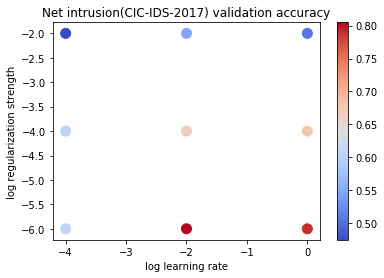

In [25]:
# Visualize the cross-validation results
import math
import matplotlib.pyplot as plt
results = accuracies
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot validation accuracy
marker_size=100
colors = [results[x] for x in results] # default size of markers is 20

plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Net intrusion(CIC-IDS-2017) validation accuracy')
plt.savefig(join(dataroot,'runs',method,'1st_run.png'))
plt.show()